<a href="https://colab.research.google.com/github/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/blob/main/Hate_Speech_Detection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from scipy import stats
import pickle

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import tensorflow.keras.regularizers as regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Import Dataset

In [2]:
url='https://raw.githubusercontent.com/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/main/train_E6oV3lV.csv'

df= pd.read_csv(url)

In [3]:
pd.set_option('display.max_colwidth', None)
df.sample(30)

,id,label,tweet
2285,2286,0,my favourite! #tsumtsum #everydaydrawing #illustration #yeg #creative #yegas #yegaâ¦
10723,10724,0,so people that don't value the best tool for the job cause others to change the tools. //@user @user @user @user
10102,10103,0,3 weeks till interrailing
3351,3352,0,what i doð
25346,25347,0,leaving #dl2016 see you next year... #save #redlip #rock #festival #music #couple #rainâ¦
29196,29197,0,check out family lawyer on how food is integral to family bonding #nomnom #foodporn #food #blog
29382,29383,0,sunday photo shooting.... #pic #photography #paners #fun #sunday #pic #selfie @user
19736,19737,0,happy national coffee cake day everyone! #coffee #cake @user
17166,17167,0,fathers day ðªâï¸ðð»ðð»ð@user @user @user @user @
17183,17184,0,thinking out loud!!! #lowkey #realhappy #joyoversadness #goodoverevilâ¦


In [4]:
df.index=df["id"]
df.drop('id', axis=1, inplace=True)
df.sample(5)

,label,tweet
id,,
14387,0,"how time flies, it's 2years today and still counting... â¦"
13620,0,i'm so ready! ðð¼ðð¼ðð¼ #foreverakid
11105,0,jon just ran over a squirrel ð #done #wtf
9873,1,@user #notmypresident not ever #misogynistic #traitor #theresistance #putinsbitch
26348,0,the next move is on you...the door is open...walk through it..#the past is over # praise god.


### Data Analysis

In [5]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


In [6]:
#  Check the Missing Value
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [8]:
# Extracting the Target Attribute for Each Class and Visualize
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


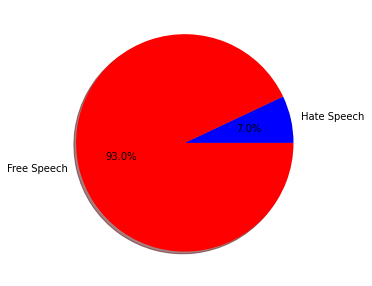

In [9]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.figure(figsize=(5, 5))
plt.pie(speech, labels = label, shadow = True, autopct = '%1.1f%%', colors=['blue', 'red'])
plt.style.use('fivethirtyeight')
plt.show()

### Add features

In [10]:
# Number of characters in the text
df['tweet_length'] = df['tweet'].apply(len)

# Number of words in the text
df['tweet_num_words'] = df['tweet'].apply(lambda x: len(x.split()))

# Average length of the words in the text
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Number of non-stopwords in the text: first we will extend the stopwords to include other words used in twitter
# such as retweet(rt) etc.

# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
df['tweet_non_stopwords'] = df['tweet'].apply(lambda x: len([t for t in x.split() if t not in stopwords]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.000000,0.0,0.0,1.000000
tweet_length,31962.0,84.739628,29.455749,11.0,63.000000,88.0,108.0,274.000000
tweet_num_words,31962.0,13.158720,5.478150,3.0,9.000000,13.0,17.0,34.000000
mean_word_len,31962.0,5.593463,1.945719,1.0,4.529412,5.2,6.2,81.333333
tweet_non_stopwords,31962.0,9.121144,3.474333,0.0,7.000000,9.0,11.0,27.000000


In [11]:
df.head()

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,4.555556,8
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,5.315789,14
3,0,bihday your majesty,21,3,5.666667,2
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,4.928571,9
5,0,factsguide: society now #motivation,39,4,8.000000,3


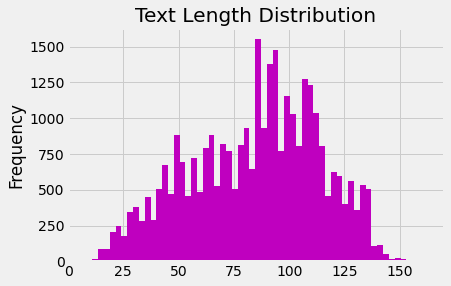

In [12]:
df["tweet_length"].plot(kind='hist', title='Text Length Distribution', xlim=[0, 170], bins = 100, figsize=(6,4),color='m')
plt.show()

**Note** : Distribution of text-length is between 5 and 150 where the most tweets-length are around 90 characters. It is also noticable that the number of tweets seem to be skewed.

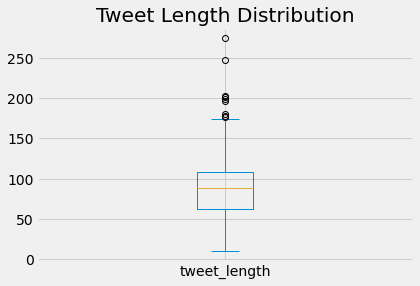

In [13]:
df["tweet_length"].plot(kind='box', title='Tweet Length Distribution', figsize=(6,4))
plt.show()

## Data Preprocessing

#### 1. Text Cleaning
- Lowercase
- Remove Punctuation
- Remove Urls
- Removing @tags
- Remove Special Characters

#### 2. Preprocessing Operations
- Tokenizing
- Removing Stop Words
- Lemmatization
- WordCloud

In [14]:
def clean_txt(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    Tweet = re.sub(regex_pat," ",tweet)
    
    #Remove @tags
    Tweet= re.sub(r'@[\w\-]+',"",Tweet)
    
    # removal of links[https://abc.com]
    url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    Tweet = re.sub(url_regex,"",Tweet)
    
    # split into words (tokenizing)
    Tweet = nltk.word_tokenize(Tweet)
    
    # convert to lower case
    Tweet = [w.lower() for w in Tweet]    
    
    # remove punctuation from each word
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    Tweet = [re_punc.sub('', w) for w in Tweet]

    # remove remaining tokens that are not alphabetic
    Tweet = [word for word in Tweet if word.isalpha()]

    # filter out stop words
    Tweet = [w for w in Tweet if w not in  stopwords] 
    
    # filter out short tokens
    Tweet = [word for word in Tweet if len(word) > 2]

    #Stemm all the words in the sentence
    lemmatizer = WordNetLemmatizer() 
    lem_words = [lemmatizer.lemmatize(word) for word in Tweet]
    combined_text = ' '.join(lem_words)
    return combined_text

# Cleaning the text data
df['cleaned_phrase'] = df['tweet'].apply(clean_txt)
df.sample(10)

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords,cleaned_phrase
id,,,,,,,
30582,0,&amp; #grateful that #money comes to me in #increasing quantities from #multiple sources on a #continuous basis,114,17,5.588235,10,amp grateful money come increasing quantity multiple source continuous basis
17595,0,"@user thank you! indeed, making the decision was the tough pa now i'm just looking forward!",93,16,4.750000,11,thank indeed making decision tough looking forward
8712,0,best #essentialoils for #anxiety !! #healthy #peace !! #altwaystoheal !!,80,10,6.300000,9,best essentialoils anxiety healthy peace altwaystoheal
7022,1,"and how do jews plan on doing the work of god without god? matthew 1:23 ""...and they will call him immanuelâ (whicâ¦",121,22,4.454545,12,jew plan work god without god matthew call
16712,0,"@user @user #bestseller #motivation #spos ""never go to bed without a #dream or wakeup without a #hope""",107,17,5.058824,13,bestseller motivation spos never bed without dream wakeup without hope
14889,0,happy today #positivethinking,32,3,9.000000,3,happy today positivethinking
26436,0,#saysomething bull up: you will dominate your bull and you will direct it whatever you want it to do. when,109,20,4.350000,9,saysomething bull dominate bull direct whatever want
8101,0,bihday kazuki bihdaykazuki bihdaykazuki bihdaykazuki bihdaykazuki,72,6,10.000000,6,bihday kazuki bihdaykazuki bihdaykazuki bihdaykazuki bihdaykazuki
10968,1,megaupload porn link porn video,33,5,5.400000,5,megaupload porn link porn video


In [15]:
# label_list = df.label.values.tolist()
cleaned_phrase_list = df.cleaned_phrase.values.tolist()
print(cleaned_phrase_list)
# print(label_list)

['father dysfunctional selfish drag kid dysfunction run', 'thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked', 'bihday majesty', 'model love take time', 'factsguide society motivation', 'huge fan fare big talking leave chaos pay dispute get allshowandnogo', 'camping tomorrow', 'next school year year think school exam hate imagine actorslife revolutionschool girl', 'love land allin cavs champion cleveland clevelandcavaliers', 'welcome', 'ireland consumer price index mom climbed previous may blog silver gold forex', 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love', 'get see daddy today gettingfed', 'cnn call michigan middle school build wall chant tcot', 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins', 'ouch junior junior yugyoem omg', 'thankful paner thankful positive', 'retweet agree', 'friday smile around via user cooky make people', 'know essential oil made 

In [16]:
# def to_array(text):
#     array = np.array(text)
#     return array

Y = df.label.to_numpy()
Y

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
#tokenization
max_words = 10000
max_len = 1500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(cleaned_phrase_list)
sequences = tok.texts_to_sequences(cleaned_phrase_list)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[   0,    0,    0, ...,  116, 6570,  306],
       [   0,    0,    0, ..., 3630, 6572, 8402],
       [   0,    0,    0, ...,    0,   17, 2812],
       ...,
       [   0,    0,    0, ..., 6355,   24,   59],
       [   0,    0,    0, ..., 1330, 1331,  421],
       [   0,    0,    0, ...,    0,   90,   99]], dtype=int32)

In [18]:
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.optimizers import Adam


embedding_mat_col=100
model = Sequential()
model.add(Embedding(max_words,embedding_mat_col,input_length = max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(2, dropout=0.4, recurrent_dropout=0.4))

model.add(Dense(1,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 100)         1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 1500, 100)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 2)                 824       
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 1,000,827
Trainable params: 1,000,827
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
X=sequences_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(22373, 1500) (22373,)
(9589, 1500) (9589,)


In [20]:
batch_size =64
model.fit(X_train, Y_train, epochs = 4, batch_size=batch_size,verbose = 1)

Epoch 1/4
350/350 [==============================] - 654s 2s/step - loss: 0.0000e+00 - accuracy: 0.0696
Epoch 2/4
  1/350 [..............................] - ETA: 10:39 - loss: 0.0000e+00 - accuracy: 0.0156

KeyboardInterrupt: ignored

In [ ]:
prediction=model.predict(X_test)

In [ ]:
pickle.dump(model, open('model_LSTM.pkl','wb'))
# model = pickle.load(open('models/RFRegressor.pkl','rb'))

In [ ]:
Prediction1=[]
for itm in prediction:
    if itm==0:
        Prediction1.append("Hate_Speech")
    else:
        Prediction1.append("Free_Speech")

results = pd.DataFrame({'lablel':Y_test,'prediction': Prediction1})
results.sample(50)

        
        
# print('Test Accuracy: ', accuracy_score(Y_test, prediction) * 100, '\n')
# print('Confusion Matrix : \n',confusion_matrix(Y_test, prediction), '\n')
# print('Classification Report : \n ',classification_report(Y_test, prediction), '\n')
# print(Y_test, '\n',Prediction1)

### Visualizations

Visualizing which of the word is most commonly used in the twitter dataset

In [ ]:
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in df['cleaned_phrase'] ])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for hate speech

In [ ]:
hate_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 1]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for free speech

In [ ]:
free_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 0]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(free_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()